# Eksik veri yapısının görselleştirilmesi

In [43]:
import pandas as pd
import numpy as np

In [44]:
import missingno as msno

In [45]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df= pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

In [46]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


<AxesSubplot: >

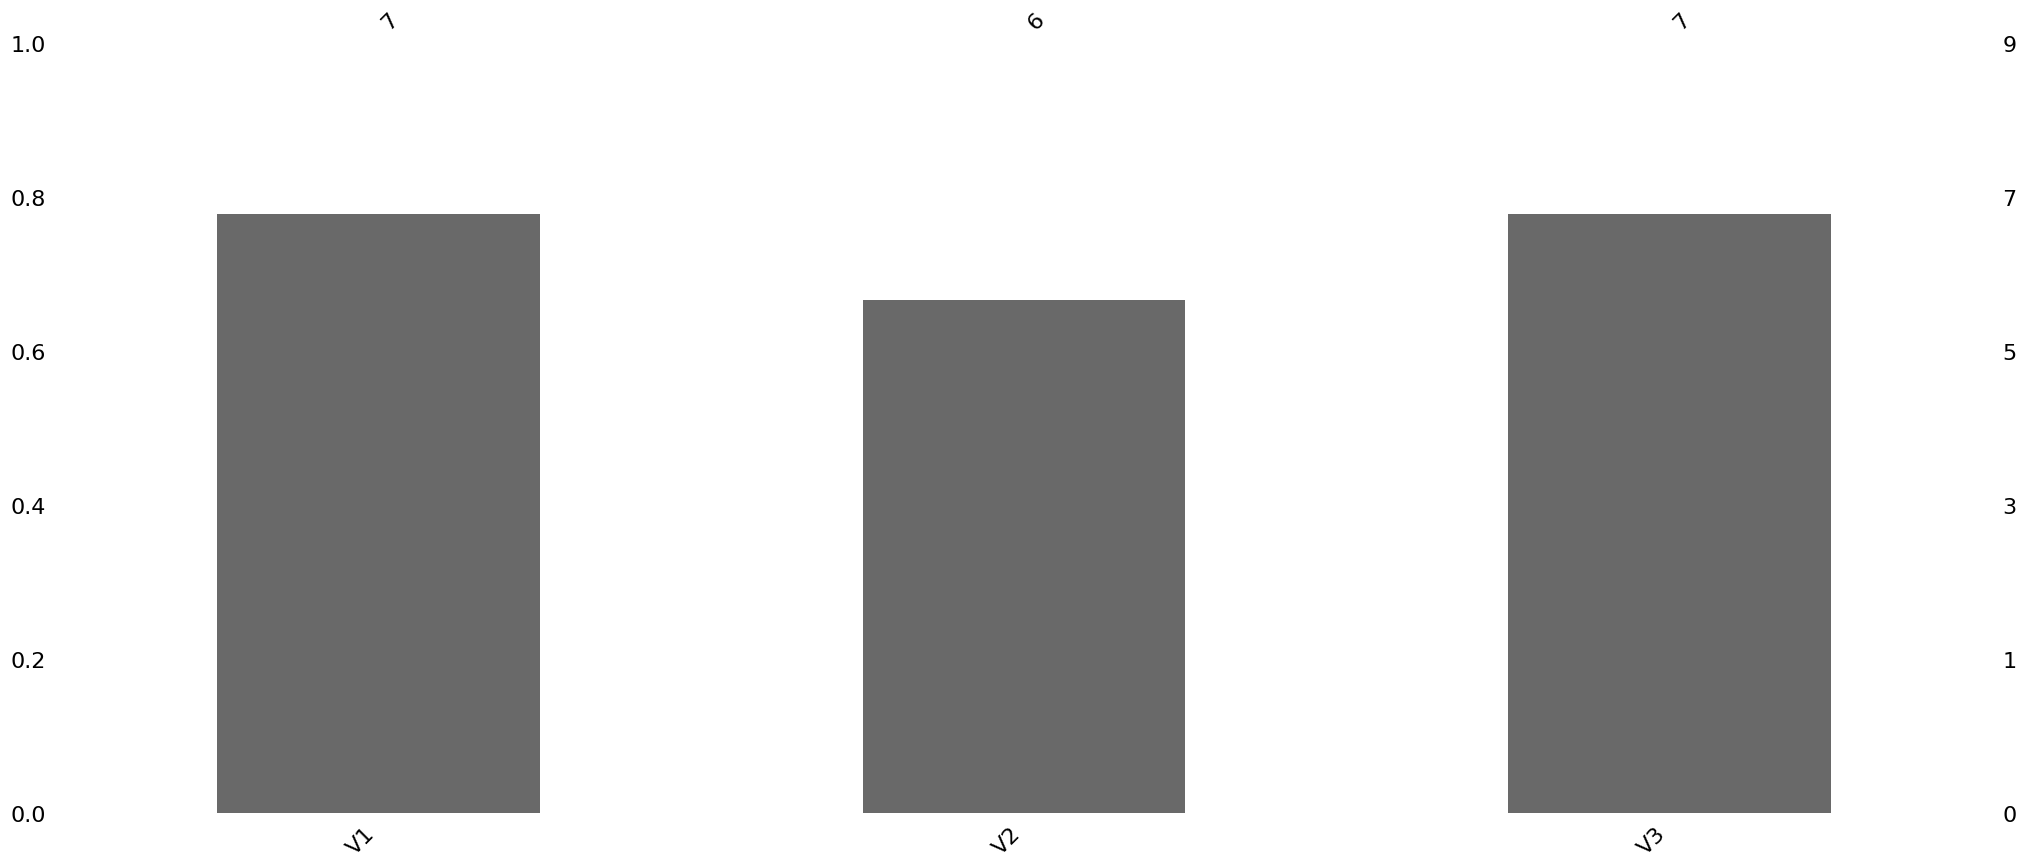

In [47]:
msno.bar(df)

<AxesSubplot: >

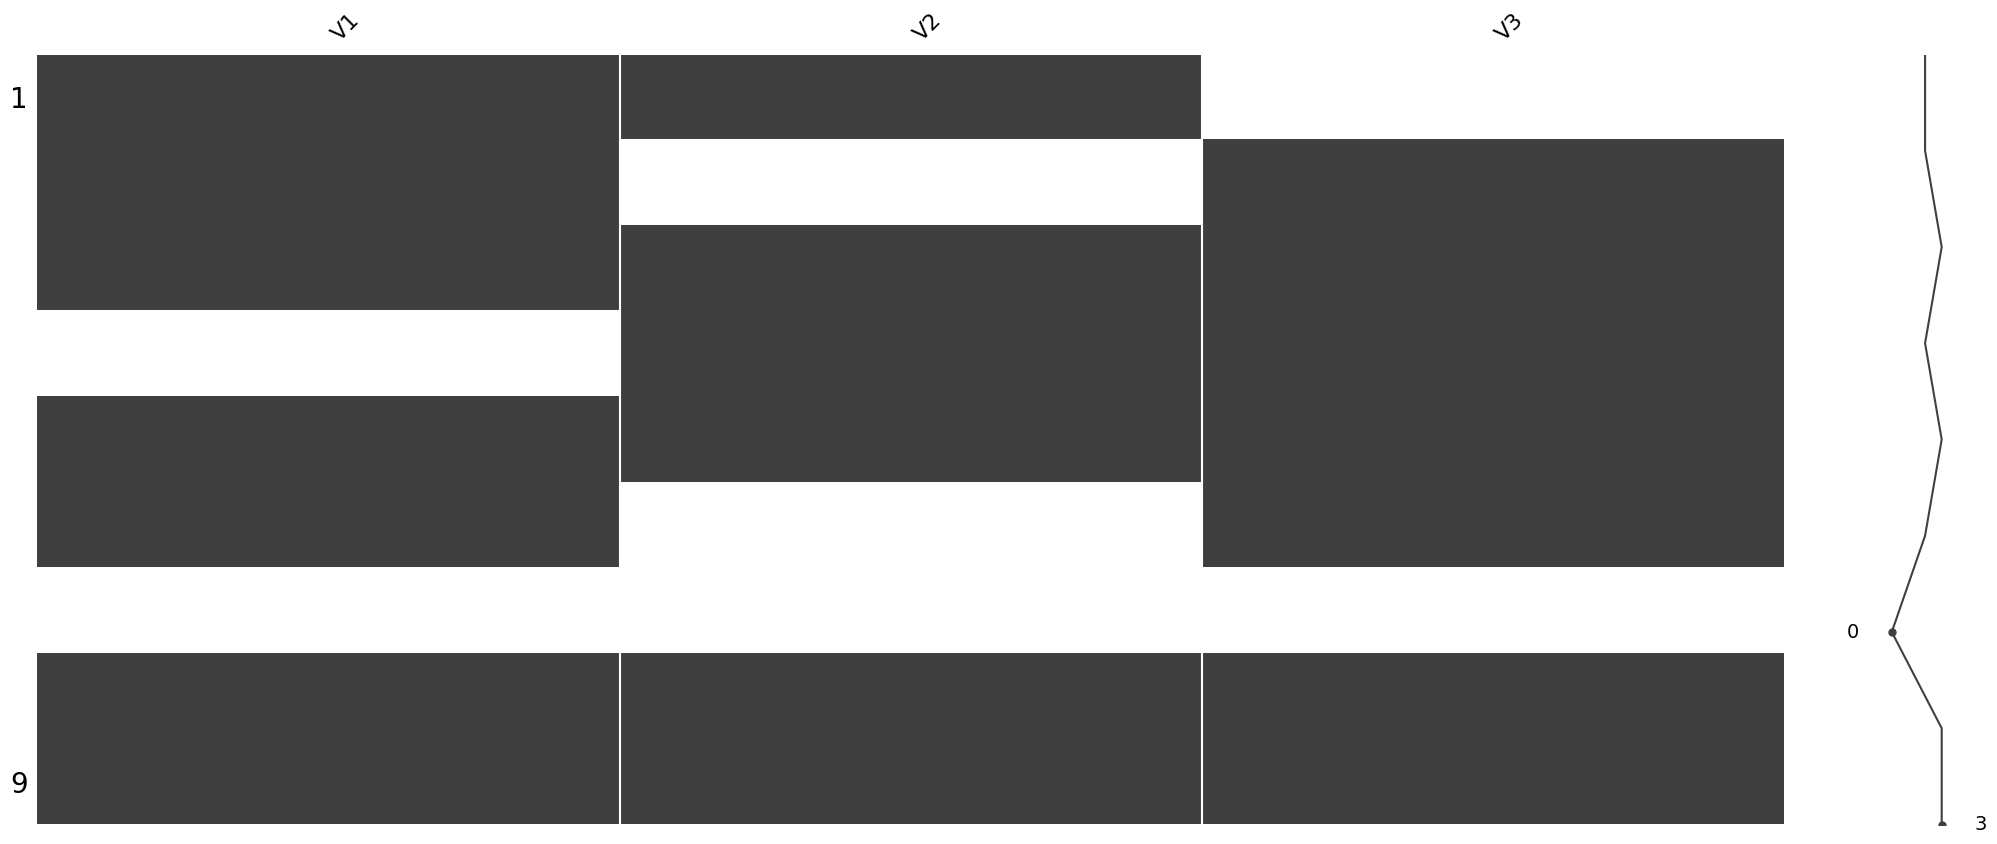

In [48]:
msno.matrix(df)

In [49]:
import seaborn as sns

<AxesSubplot: >

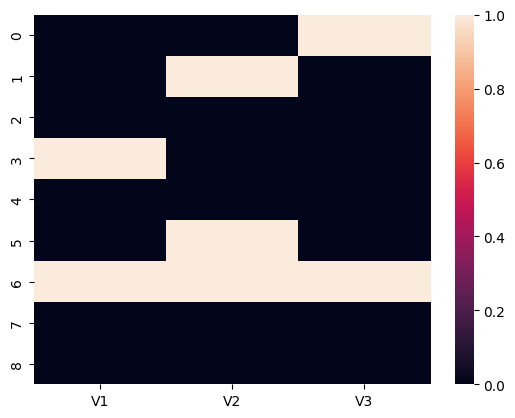

In [50]:
sns.heatmap(df.isnull())

In [51]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [52]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<AxesSubplot: >

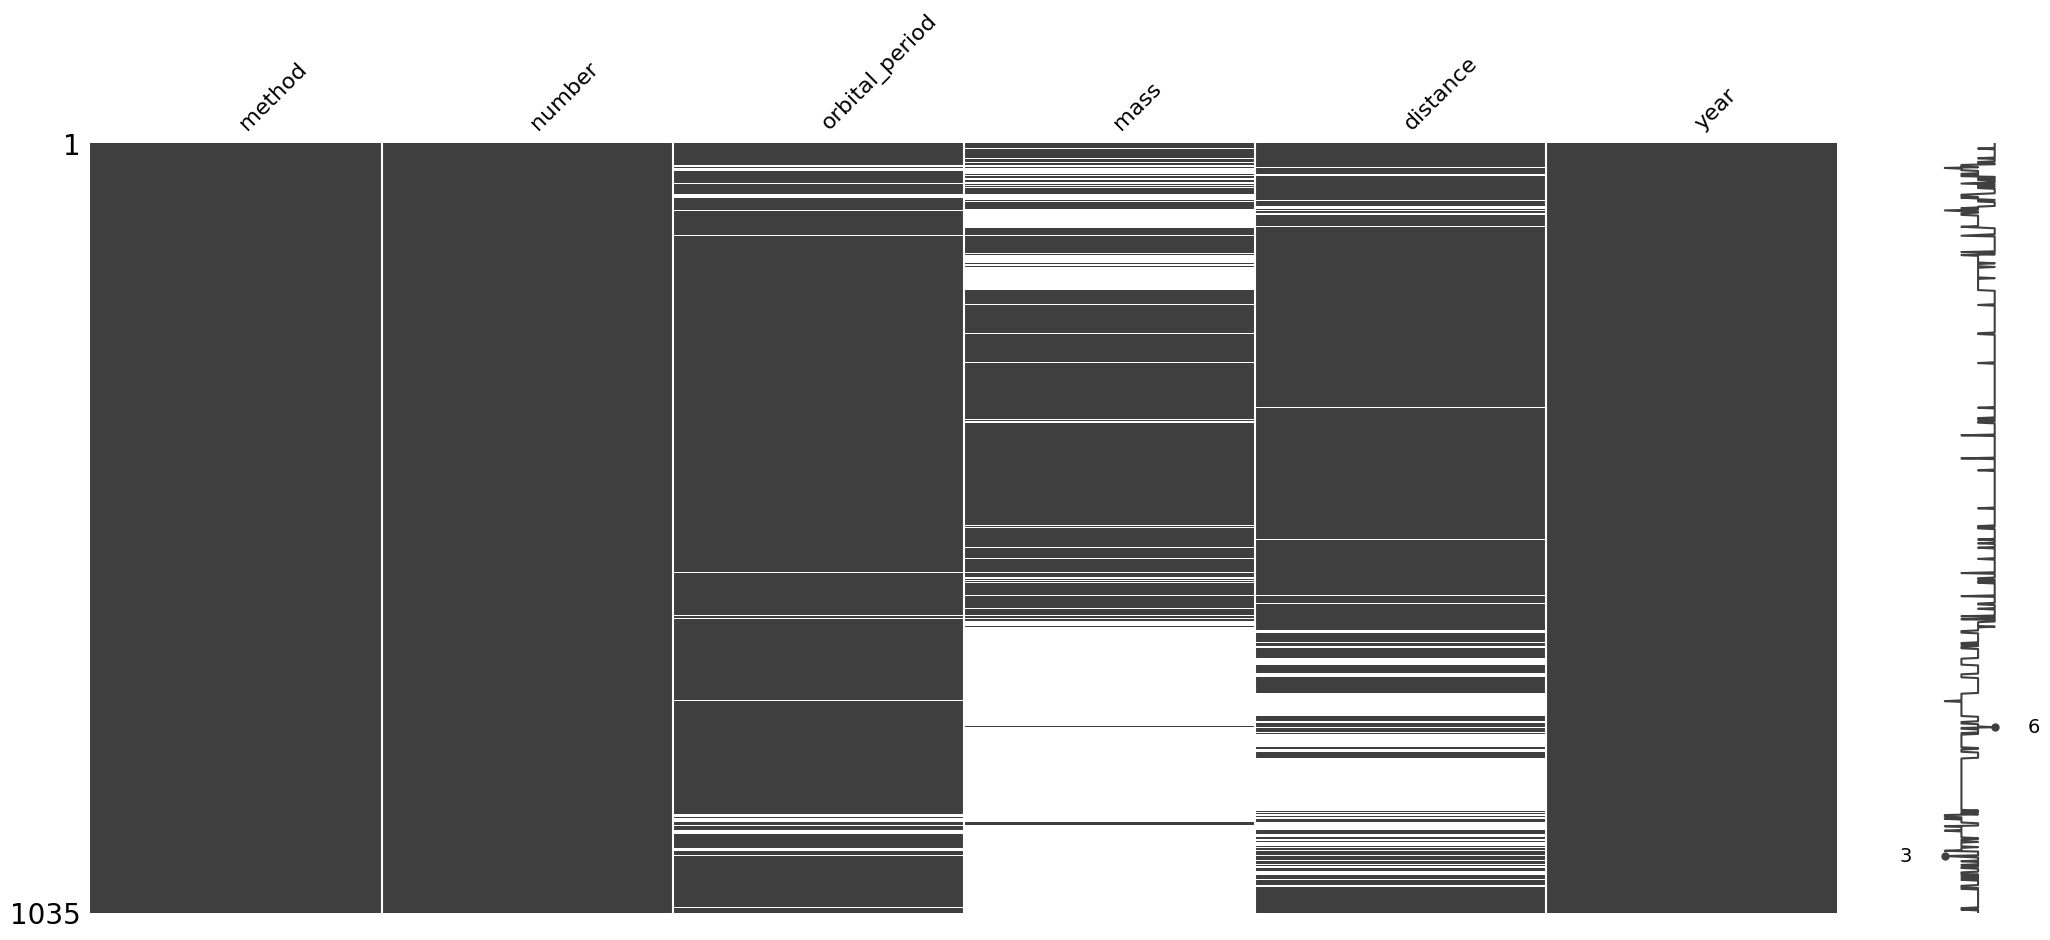

In [53]:
msno.matrix(df)

<AxesSubplot: >

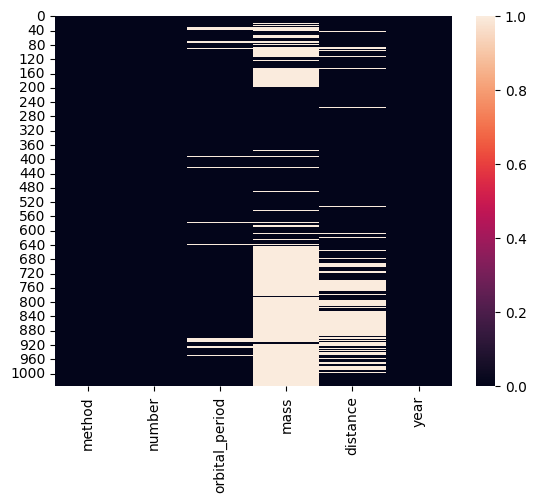

In [54]:
sns.heatmap(df.isnull())

<AxesSubplot: >

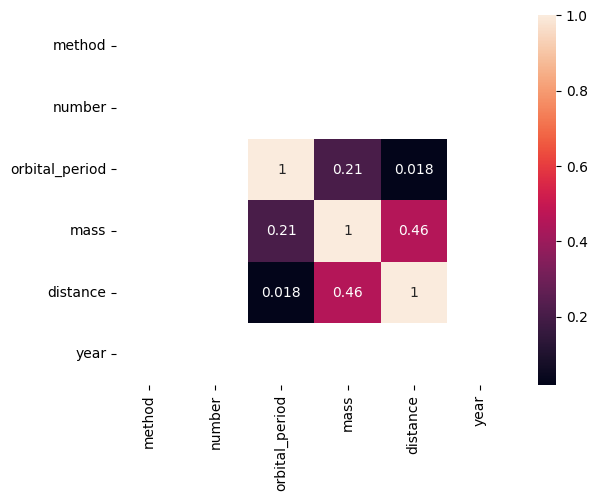

In [55]:
sns.heatmap(df.isnull().corr(),annot=True)

<AxesSubplot: >

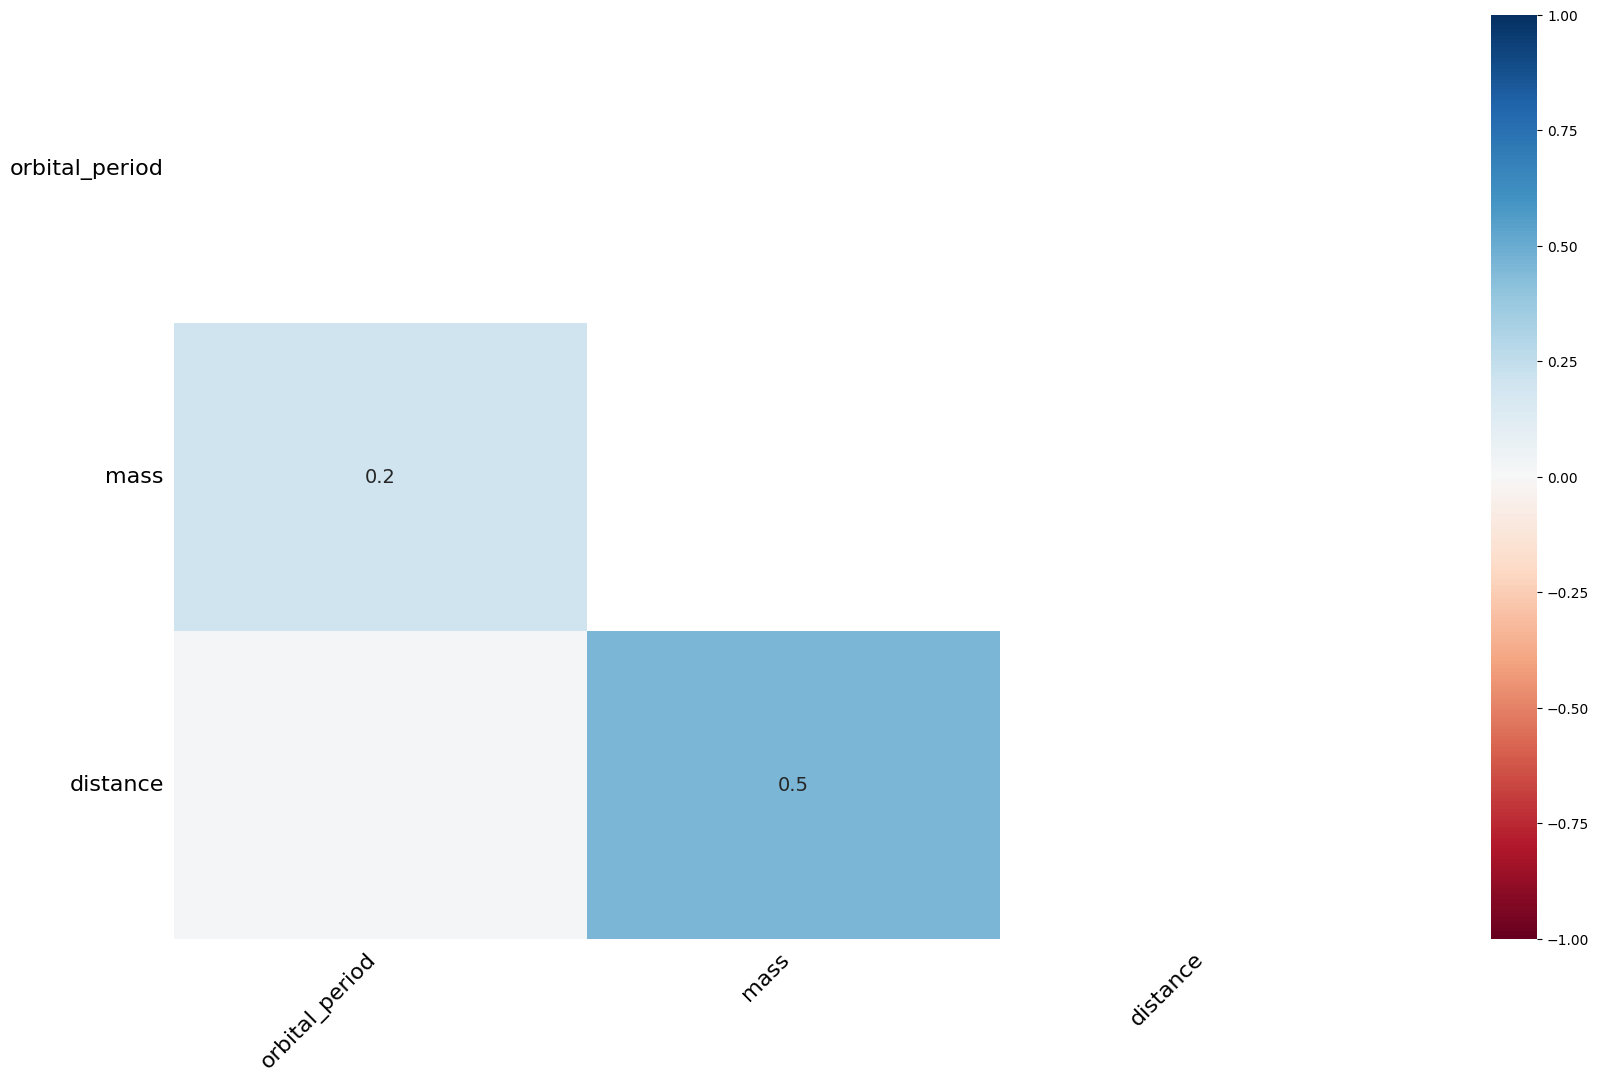

In [56]:
msno.heatmap(df)

# silme yöntemleri

In [57]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [58]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df= pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

In [59]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [60]:
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [61]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8


In [62]:
df.dropna(axis=1,how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


# basit değer atama

In [63]:
# Sayıasl değişkenlerde atama

In [64]:
df["V1"].fillna(0)


0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [65]:

df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [66]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [67]:
# ikinci yol

In [68]:
df.fillna(df.mean()["V1":"V2"])


,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [69]:
df.fillna(df["V3"].median())


,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [70]:
# ucuncu yol

In [71]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# Kategorik değişken kırılımında değer atama

# Tahmine dayalı

In [72]:
df = sns.load_dataset("titanic")
df= df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [73]:
from ycimpute.imputer import knnimput

In [74]:
var_names = list(df)

In [75]:
n_df = np.array(df)

In [76]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [77]:
dff = knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.211
Imputing row 101/891 with 0 missing, elapsed time: 0.213
Imputing row 201/891 with 0 missing, elapsed time: 0.214
Imputing row 301/891 with 1 missing, elapsed time: 0.215
Imputing row 401/891 with 0 missing, elapsed time: 0.216
Imputing row 501/891 with 0 missing, elapsed time: 0.221
Imputing row 601/891 with 0 missing, elapsed time: 0.223
Imputing row 701/891 with 0 missing, elapsed time: 0.225
Imputing row 801/891 with 0 missing, elapsed time: 0.226


In [78]:
type(dff)

numpy.ndarray

In [79]:
dff = pd.DataFrame(dff,columns=var_names)

In [80]:
type(dff)

pandas.core.frame.DataFrame

In [81]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
df = sns.load_dataset("titanic")
df= df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()